In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Simulations #1

## Read CSVs

In [33]:
rashomon_csv = "../Results/worst_case_rashomon.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff
0,10,0,4,1.273589,0.666667,True,0.431312
1,10,0,6,1.273541,0.666667,True,0.431312
2,10,0,6,1.246443,0.666667,True,0.431312
3,10,0,6,1.163541,0.500000,True,-0.031748
4,10,0,6,0.882880,1.000000,True,-0.124469


In [34]:
lasso_csv = "../Results/worst_case_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff
0,10,0,1.292713,1.815938,0.0,False,0.767750
1,10,1,1.306908,1.829085,0.0,False,0.778222
2,10,2,1.213292,1.753783,0.0,False,0.595090
3,10,3,1.438126,1.972719,0.0,False,0.654070
4,10,4,1.455133,1.967549,0.0,False,0.875831


## Summarize rashomon sets results

In [37]:
rashomon_df = rashomon_raw_df.copy()

rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4,6.750000,9,3.071429,0.853268,1.056888,1.273589,0.039268,...,1.0,0.047619,False,0.875000,True,0.125000,0.001008,0.081593,0.186030,0.007644
8,10,1,4,6.750000,9,3.071429,0.940916,1.143865,1.351151,0.035473,...,1.0,0.047619,False,0.875000,True,0.125000,0.001543,0.152435,0.361632,0.030337
16,10,2,4,6.333333,9,2.606061,0.831106,1.162066,1.349434,0.058437,...,1.0,0.035985,False,0.916667,True,0.083333,0.000141,0.405905,1.090605,0.195139
28,10,3,4,6.571429,9,4.619048,0.999373,1.206772,1.556189,0.066699,...,1.0,0.054233,True,1.000000,True,0.000000,0.009221,0.150018,0.694018,0.062911
35,10,4,4,7.000000,9,4.000000,0.942567,1.089282,1.433604,0.045067,...,1.0,0.062963,True,1.000000,True,0.000000,0.026816,0.080342,0.259708,0.008189
41,10,5,4,6.400000,9,3.155556,0.861775,1.158657,1.583911,0.067422,...,1.0,0.043519,False,0.800000,True,0.177778,0.001373,0.115434,0.686098,0.042811
51,10,6,4,7.000000,9,4.000000,0.961025,1.111481,1.437311,0.042469,...,1.0,0.062963,False,0.833333,True,0.166667,0.000074,0.061423,0.349174,0.019895
57,10,7,4,6.400000,9,3.155556,0.961201,1.209663,1.520150,0.048061,...,1.0,0.043519,False,0.900000,True,0.100000,0.053490,0.478465,1.688050,0.290784
67,10,8,4,6.857143,9,3.476190,0.979523,1.146745,1.434280,0.039462,...,1.0,0.054233,True,1.000000,True,0.000000,0.003527,0.074415,0.216703,0.009557
74,10,9,4,6.750000,9,3.071429,0.997503,1.147400,1.308940,0.022019,...,1.0,0.047619,True,1.000000,True,0.000000,0.005274,0.186101,0.475842,0.057618


## Average over simulations

In [38]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var"
]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4.04,6.664754,8.91,3.419607,0.925803,1.140127,1.449453,0.046629,...,1.0,0.049794,0.44,0.894185,1.0,0.095748,0.022374,0.200069,0.642109,0.073872
905,100,0,4.00,6.743858,9.00,3.297025,0.991623,1.165520,1.405384,0.037915,...,1.0,0.049614,0.44,0.921789,1.0,0.076777,0.002441,0.105591,0.364920,0.030087
1690,1000,0,4.00,6.760000,9.00,3.108571,0.999279,1.171630,1.372884,0.035664,...,1.0,0.048233,0.48,0.934167,1.0,0.065833,0.000264,0.091731,0.249096,0.016358
2482,5000,0,4.00,6.750000,9.00,3.071429,1.000382,1.176021,1.375080,0.036189,...,1.0,0.047619,0.46,0.932500,1.0,0.067500,0.000055,0.093966,0.250364,0.016789


In [40]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,1.008689,1.317999,1.755309,0.019280,1.521755,1.840381,2.269648,0.019690,...,0.666667,0.010505,False,0.01,True,0.01,0.002666,0.644493,1.494646,0.096290
100,100,0,1.255466,1.351934,1.448634,0.001654,1.776271,1.873097,1.973138,0.001719,...,0.000000,0.000000,False,0.00,False,0.00,0.399386,0.626152,0.982225,0.011811
200,1000,0,1.319118,1.357715,1.398697,0.000230,1.839873,1.878554,1.925381,0.000243,...,0.000000,0.000000,False,0.00,False,0.00,0.537522,0.627140,0.700546,0.001246
300,5000,0,1.342784,1.360589,1.375497,0.000043,1.864177,1.881055,1.895010,0.000043,...,0.000000,0.000000,False,0.00,False,0.00,0.593887,0.632650,0.678142,0.000204


## Plots

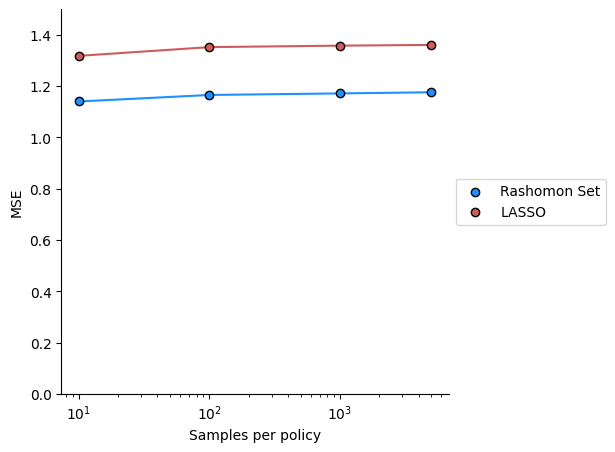

In [41]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1.5)
ax.set_ylabel("MSE")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/MSE.png", dpi=300, bbox_inches="tight")
plt.show()

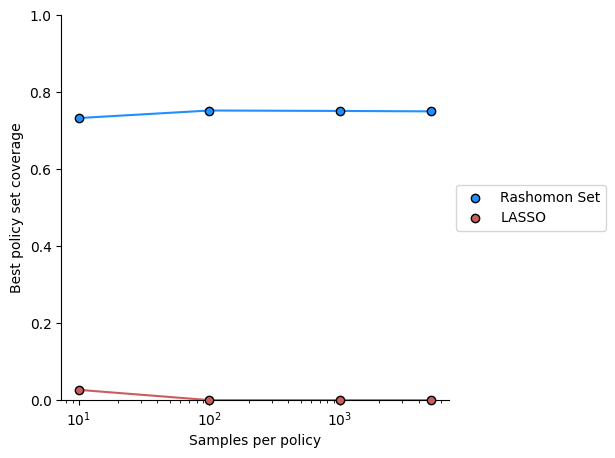

In [149]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3)
ax.scatter(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
           color="indianred", edgecolor="black", zorder=3.5, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1)
ax.set_ylabel("Best policy set coverage")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/policy_coverage.png", dpi=300, bbox_inches="tight")
plt.show()

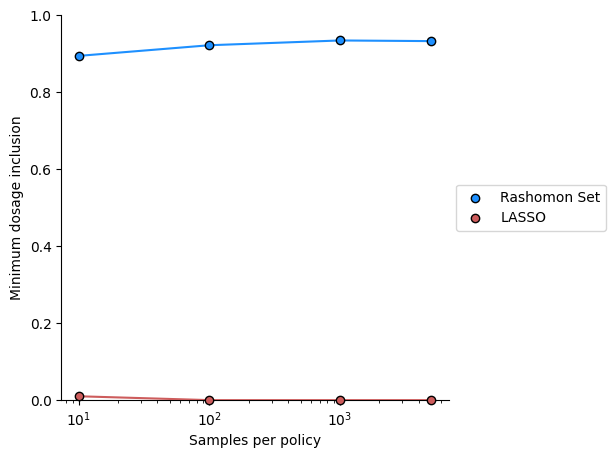

In [42]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3)
ax.scatter(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
           color="indianred", edgecolor="black", zorder=3.5, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1)
ax.set_ylabel("Minimum dosage inclusion")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/min_dosage_inclusion.png", dpi=300, bbox_inches="tight")
plt.show()

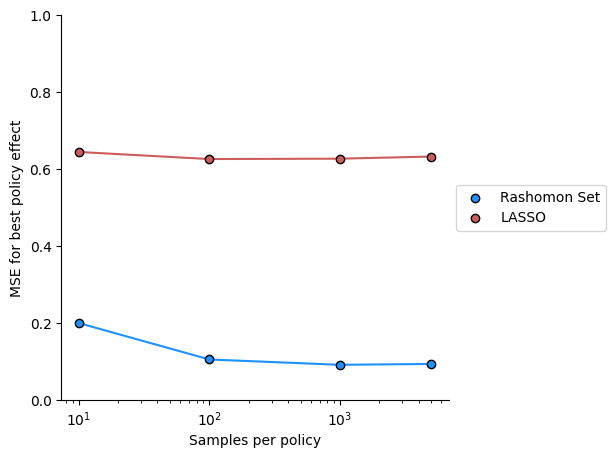

In [43]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=1)
ax.scatter(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
           color="indianred", edgecolor="black", zorder=3, clip_on=False,
           label="LASSO")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1)
ax.set_ylabel("MSE for best policy effect")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/best_policy_MSE.png", dpi=300, bbox_inches="tight")
plt.show()

# Simulations #2

In [44]:
rashomon_csv = "../Results/simulation_3_rashomon.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0)","(0, 1)","(1, 0)","(1, 1)"
0,10,0,5,1.580639,0.0,False,-0.051271,0,0,1,0
1,10,0,6,1.555768,0.0,False,-0.051271,0,0,1,0
2,10,0,6,1.572758,0.0,False,-0.051271,0,0,1,0
3,10,0,6,1.575672,0.0,False,-0.051271,0,0,1,0
4,10,0,6,1.575736,0.0,False,-0.051271,0,0,1,0


In [45]:
lasso_csv = "../Results/simulation_3_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff,"(0, 0)","(0, 1)","(1, 0)","(1, 1)"
0,10,0,1.913840,2.425576,0.0,False,0.573729,0,0,1,0
1,10,1,1.825330,2.386698,0.0,False,0.608916,0,0,1,0
2,10,2,1.771865,2.308133,0.0,False,1.046998,0,0,1,0
3,10,3,1.626072,2.103031,0.0,False,1.380396,0,0,1,0
4,10,4,1.873852,2.348747,0.0,False,1.373491,0,0,1,0


### Summarize Rashomon results

In [46]:
rashomon_df = rashomon_raw_df.copy()

reg = 1e-1
rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2
rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")


# Find the frequency of best profiles in Rashomon set
# Also find the best profile in the best model in every set
profile_cols = ["(0, 0)", "(0, 1)", "(1, 0)", "(1, 1)"]
x = rashomon_df.groupby(group_by_cols)["loss"].idxmin()
for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    profile_best_col = profile + "_best"
    rashomon_df[profile_mean_col] = rashomon_df.groupby(group_by_cols)[profile].transform("mean")
    rashomon_df[profile_best_col] = rashomon_df[profile].loc[x]
    

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(profile_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff", "loss"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0)_mean","(0, 0)_best","(0, 1)_mean","(0, 1)_best","(1, 0)_mean","(1, 0)_best","(1, 1)_mean","(1, 1)_best"
0,10,0,4,8.097479,10,1.640313,1.449988,1.591831,1.837633,0.012483,...,0.774640,0.060392,0.0,0.0,0.000000,0.0,1.000000,1.0,0.000000,0.0
595,10,1,4,8.378079,10,1.786597,1.460534,1.544487,1.750861,0.011598,...,0.118130,0.001441,0.0,0.0,0.000000,0.0,1.000000,1.0,0.000000,0.0
1407,10,2,4,8.457729,11,1.914777,1.387186,1.506055,1.804495,0.020516,...,0.178083,0.003806,0.0,0.0,0.712560,1.0,0.287440,0.0,0.000000,0.0
2235,10,3,4,9.412449,12,2.822220,1.226995,1.373597,1.612912,0.017666,...,0.570623,0.020266,0.0,0.0,0.611402,1.0,0.388598,0.0,0.000000,0.0
3954,10,4,4,7.884211,10,1.419054,1.495369,1.589807,1.849423,0.013737,...,0.560238,0.037100,0.0,0.0,0.665263,1.0,0.334737,0.0,0.000000,0.0
4429,10,5,4,9.137324,12,2.666823,1.284622,1.407707,1.656943,0.016971,...,0.175633,0.004230,0.0,0.0,0.105634,1.0,0.894366,0.0,0.000000,0.0
5849,10,6,4,8.877934,11,2.400499,1.340261,1.464558,1.791065,0.019361,...,0.698715,0.108348,0.0,0.0,0.398122,1.0,0.601878,0.0,0.000000,0.0
6914,10,7,4,8.343511,11,1.612220,1.399057,1.519269,1.713225,0.013216,...,0.160488,0.003520,0.0,0.0,0.124318,1.0,0.875682,0.0,0.000000,0.0
7831,10,8,4,9.643955,13,3.106893,1.158893,1.326138,1.584577,0.014519,...,0.661919,0.026705,0.0,0.0,0.301230,1.0,0.697234,0.0,0.001537,0.0
9783,10,9,4,8.422007,11,1.868910,1.391553,1.523296,1.789064,0.016385,...,0.639828,0.074734,0.0,0.0,0.000000,0.0,1.000000,1.0,0.000000,0.0


### Average over simulations

In [47]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var",
]
sum_cols += [profile + "_best" for profile in profile_cols]
sum_cols += [profile + "_mean" for profile in profile_cols]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0)_mean","(0, 0)_best","(0, 1)_mean","(0, 1)_best","(1, 0)_mean","(1, 0)_best","(1, 1)_mean","(1, 1)_best"
0,10,0,4.05,8.797295,11.07,2.252198,1.345017,1.465095,1.786569,0.016634,...,0.484147,0.051779,0.0,0.0,0.380366,0.71,0.619619,0.29,0.000015,0.0
104407,100,0,4.00,8.322952,9.76,1.686599,1.472852,1.538096,1.845093,0.014237,...,0.052315,0.000399,0.0,0.0,0.525893,0.92,0.474107,0.08,0.000000,0.0
169033,1000,0,4.00,8.500879,9.94,1.871476,1.477453,1.529055,1.846880,0.013098,...,0.031647,0.000090,0.0,0.0,0.804696,1.00,0.195304,0.00,0.000000,0.0
235643,5000,0,4.00,8.567581,10.00,1.923507,1.480710,1.526060,1.849773,0.012014,...,0.030018,0.000071,0.0,0.0,0.849431,1.00,0.150569,0.00,0.000000,0.0


In [48]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")


for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    lasso_df[profile_mean_col] = lasso_df.groupby("n_per_pol")[profile].transform("mean")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df = lasso_df.drop(profile_cols, axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var,"(0, 0)_mean","(0, 1)_mean","(1, 0)_mean","(1, 1)_mean"
0,10,0,1.401586,1.755324,2.108566,0.024030,1.930968,2.304771,2.673490,0.025805,...,False,0.0,0.008624,0.859228,2.855130,0.362323,0.0,0.0,0.99,0.01
100,100,0,1.693091,1.809803,1.948204,0.002818,2.228900,2.362148,2.491062,0.002798,...,False,0.0,0.373669,0.652974,1.285175,0.026797,0.0,0.0,1.00,0.00
200,1000,0,1.759594,1.807284,1.857761,0.000305,2.302614,2.361599,2.414464,0.000335,...,False,0.0,0.541526,0.641395,0.743059,0.002362,0.0,0.0,1.00,0.00
300,5000,0,1.793108,1.810133,1.826467,0.000048,2.349519,2.364848,2.383159,0.000050,...,False,0.0,0.577830,0.636457,0.706233,0.000543,0.0,0.0,1.00,0.00


### Plots for best policy profile

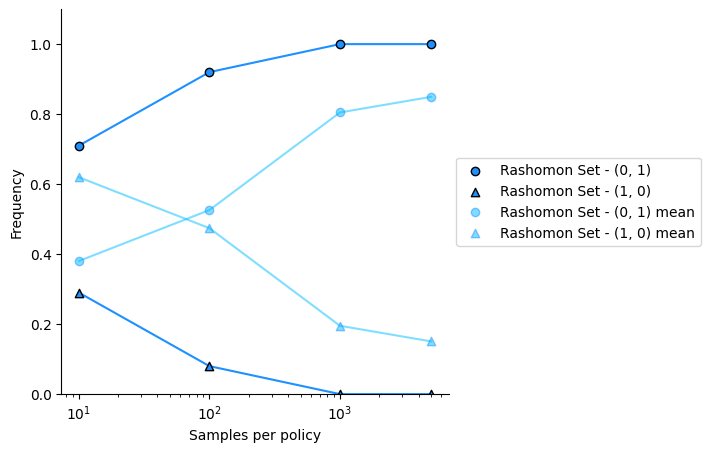

In [63]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

# Rashomon Means
ax.plot(rashomon_df["n_per_pol"], rashomon_df["(0, 1)_best"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["(0, 1)_best"],
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set - (0, 1)")

ax.plot(rashomon_df["n_per_pol"], rashomon_df["(1, 0)_best"],
        color="dodgerblue", zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["(1, 0)_best"], marker="^",
           color="dodgerblue", edgecolor="black", zorder=1.1, label="Rashomon Set - (1, 0)")

# Rashomon Means
ax.plot(rashomon_df["n_per_pol"], rashomon_df["(0, 1)_mean"],
        color="deepskyblue", alpha=0.5, zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["(0, 1)_mean"],
           color="deepskyblue", alpha=0.5, edgecolor="dodgerblue", zorder=1.1, label="Rashomon Set - (0, 1) mean")

ax.plot(rashomon_df["n_per_pol"], rashomon_df["(1, 0)_mean"],
        color="deepskyblue", alpha=0.5, zorder=1)
ax.scatter(rashomon_df["n_per_pol"], rashomon_df["(1, 0)_mean"], marker="^",
           color="deepskyblue", alpha=0.5, edgecolor="dodgerblue", zorder=1.1, label="Rashomon Set - (1, 0) mean")

# LASSO
# ax.plot(lasso_df["n_per_pol"], lasso_df["(0, 1)_mean"],
#         color="indianred", zorder=1)
# ax.scatter(lasso_df["n_per_pol"], lasso_df["(0, 1)_mean"],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            label="LASSO - (0, 1)")

# ax.plot(lasso_df["n_per_pol"], lasso_df["(1, 0)_mean"],
#         color="indianred", zorder=1)
# ax.scatter(lasso_df["n_per_pol"], lasso_df["(1, 0)_mean"], marker="^",
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            label="LASSO - (1, 0)")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy")
ax.set_ylim(0, 1.1)
ax.set_ylabel("Frequency")

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/best_policy_MSE.png", dpi=300, bbox_inches="tight")
plt.show()